In [1]:
pip freeze > requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [3]:
data_df = pd.read_csv("Project_data_csv")

In [4]:
data_df.shape

(270223, 30)

In [5]:
data_df.head()

,Unnamed: 0,batting_team,bowling_team,innings_num,over_col,ball_col,Match ID,Start Date,Runs,Running Total,...,Wickets Remaining,Extras,Over and Balls Total,Team Value,DLS %,Target Score,Ground RPO,Ground RPW,Batting Team Result DLS,DLS Correct?
0,0,Pakistan,Australia,2,20,1,1000887,2017-01-13,0,91,...,7,N/E,55,16,38.6,104,4.79,29.31,Australia,Yes
1,1,Pakistan,Australia,2,20,2,1000887,2017-01-13,0,91,...,7,N/E,55,16,38.8,104,4.79,29.31,Australia,Yes
2,2,Pakistan,Australia,2,20,3,1000887,2017-01-13,0,91,...,7,N/E,55,16,38.9,105,4.79,29.31,Australia,Yes
3,3,Pakistan,Australia,2,20,4,1000887,2017-01-13,0,91,...,7,N/E,55,16,39.1,105,4.79,29.31,Australia,Yes
4,4,Pakistan,Australia,2,20,5,1000887,2017-01-13,1,92,...,7,N/E,55,16,39.3,106,4.79,29.31,Australia,Yes


In [6]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270223 entries, 0 to 270222
Data columns (total 30 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Unnamed: 0               270223 non-null  int64  
 1   batting_team             270223 non-null  object 
 2   bowling_team             270223 non-null  object 
 3   innings_num              270223 non-null  int64  
 4   over_col                 270223 non-null  int64  
 5   ball_col                 270223 non-null  int64  
 6   Match ID                 270223 non-null  int64  
 7   Start Date               270223 non-null  object 
 8   Runs                     270223 non-null  int64  
 9   Running Total            270223 non-null  int64  
 10  Batter out               270223 non-null  object 
 11  Wickets taken            270223 non-null  int64  
 12  Start Team               270223 non-null  object 
 13  Remaining Team           270223 non-null  object 
 14  Venu

Do I need to change the original data code to change batting team and bowling team to team 1 and team 2?  And should I remove 

In [7]:
winner_no = []
for index, row in data_df.iterrows():
    if row['Winner'] == row['batting_team']:
        winner_no.append(2)
    elif row['Winner'] == row['bowling_team']:
        winner_no.append(1)
    else:
       winner_no.append(0)
       print(row['Winner'])

tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie
tie


In [8]:
winner_no_df = pd.DataFrame(winner_no)

In [9]:
winner_no_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270223 entries, 0 to 270222
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype
---  ------  --------------   -----
 0   0       270223 non-null  int64
dtypes: int64(1)
memory usage: 2.1 MB


In [10]:
winner_no_df.rename(columns={0: 'Winner_num'}, inplace=True)

Turning the Team 1 win, Team 2 win and tie numbers into 3 categories (2,1,0 respectively)

In [11]:
#winner_no_df['Winner_num'] = winner_no_df.Winner_num.astype('category')


In [12]:
data_df['Winner_num'] = winner_no_df['Winner_num']

In [13]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270223 entries, 0 to 270222
Data columns (total 31 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Unnamed: 0               270223 non-null  int64  
 1   batting_team             270223 non-null  object 
 2   bowling_team             270223 non-null  object 
 3   innings_num              270223 non-null  int64  
 4   over_col                 270223 non-null  int64  
 5   ball_col                 270223 non-null  int64  
 6   Match ID                 270223 non-null  int64  
 7   Start Date               270223 non-null  object 
 8   Runs                     270223 non-null  int64  
 9   Running Total            270223 non-null  int64  
 10  Batter out               270223 non-null  object 
 11  Wickets taken            270223 non-null  int64  
 12  Start Team               270223 non-null  object 
 13  Remaining Team           270223 non-null  object 
 14  Venu

Chose numerical values that feed into my hypothesis (wickets taken, team value, ground scores and remaining overs and balls feed into the prediction.)  Changed Winner into a numerical field for prediction as this will be the target variable.

In [14]:
data_df = data_df[['Unnamed: 0', 'Wickets taken', 'Remainder', 'Team Value', 'Ground RPO', 'Ground RPW', 'Winner_num']]

In [15]:
data_df.rename(columns={'Unnamed: 0': 'Row ID'}, inplace=True)

In [16]:
data_df

,Row ID,Wickets taken,Remainder,Team Value,Ground RPO,Ground RPW,Winner_num
0,0,3,29.5,16,4.79,29.31,1
1,1,3,29.4,16,4.79,29.31,1
2,2,3,29.3,16,4.79,29.31,1
3,3,3,29.2,16,4.79,29.31,1
4,4,3,29.1,16,4.79,29.31,1
...,...,...,...,...,...,...,...
270218,270218,3,3.0,13,5.40,31.64,2
270219,270219,3,2.5,13,5.40,31.64,2
270220,270220,3,2.4,13,5.40,31.64,2
270221,270221,3,2.3,13,5.40,31.64,2


In [17]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270223 entries, 0 to 270222
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Row ID         270223 non-null  int64  
 1   Wickets taken  270223 non-null  int64  
 2   Remainder      270223 non-null  float64
 3   Team Value     270223 non-null  int64  
 4   Ground RPO     270223 non-null  float64
 5   Ground RPW     270223 non-null  float64
 6   Winner_num     270223 non-null  int64  
dtypes: float64(3), int64(4)
memory usage: 14.4 MB


In [18]:
data_df.describe()

,Row ID,Wickets taken,Remainder,Team Value,Ground RPO,Ground RPW,Winner_num
count,270223.000000,270223.000000,270223.000000,270223.000000,270223.000000,270223.000000,270223.000000
mean,135111.000000,4.340881,17.326729,12.531653,4.944435,30.351967,1.466067
std,78006.805233,2.190549,7.871791,5.533073,0.353677,3.465019,0.524029
min,0.000000,0.000000,0.000000,1.000000,3.980000,20.560000,0.000000
25%,67555.500000,3.000000,11.200000,8.000000,4.720000,28.180000,1.000000
50%,135111.000000,4.000000,18.100000,13.000000,4.850000,29.640000,1.000000
75%,202666.500000,6.000000,24.200000,17.000000,5.090000,32.440000,2.000000
max,270222.000000,10.000000,30.000000,29.000000,6.910000,53.080000,2.000000


#write some commentary here about the statistics

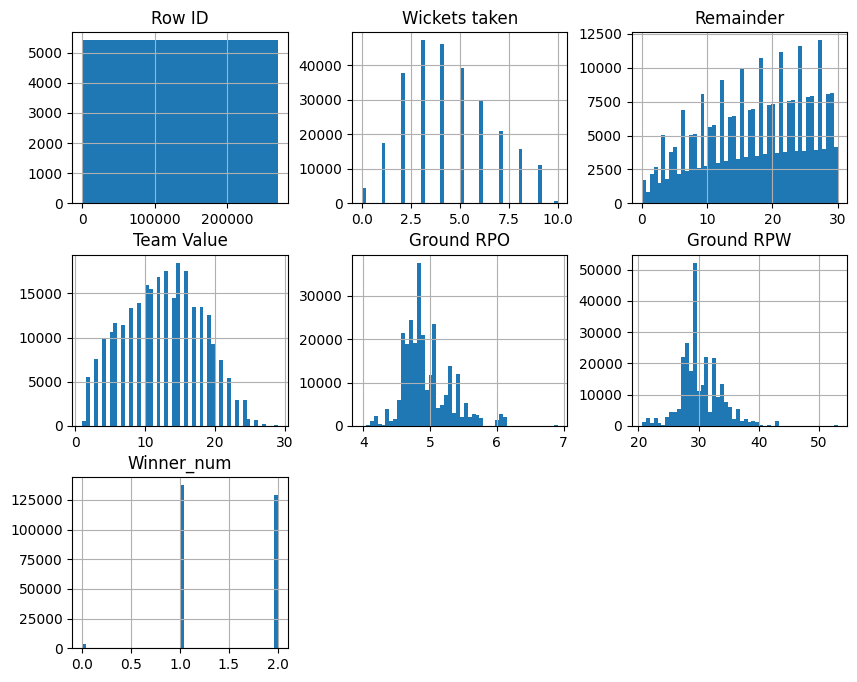

In [19]:
data_df.hist(bins=50, figsize=(10, 8))
plt.show()

In [20]:
data_df['Winner_num'].value_counts()

Winner_num
1    137321
2    129422
0      3480
Name: count, dtype: int64

In [21]:
data_df.shape

(270223, 7)

In [22]:
from zlib import crc32

def is_id_in_test_set(identifier, test_ratio):
    return crc32(np.int64(identifier)) < test_ratio * 2**32

def split_data_with_id_hash(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: is_id_in_test_set(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [23]:
train_set, test_set = split_data_with_id_hash(data_df, 0.2, "Row ID")

In [24]:
train_set.shape

(216178, 7)

In [25]:
test_set.shape

(54045, 7)

In [26]:
data_train = train_set.copy()

In [27]:
data_train

,Row ID,Wickets taken,Remainder,Team Value,Ground RPO,Ground RPW,Winner_num
0,0,3,29.5,16,4.79,29.31,1
1,1,3,29.4,16,4.79,29.31,1
3,3,3,29.2,16,4.79,29.31,1
4,4,3,29.1,16,4.79,29.31,1
6,6,3,28.5,16,4.79,29.31,1
...,...,...,...,...,...,...,...
270216,270216,3,3.2,13,5.40,31.64,2
270218,270218,3,3.0,13,5.40,31.64,2
270219,270219,3,2.5,13,5.40,31.64,2
270220,270220,3,2.4,13,5.40,31.64,2


In [28]:
corr_matrix = data_train.corr()
corr_matrix['Winner_num']

Row ID           0.019944
Wickets taken   -0.446453
Remainder        0.041994
Team Value       0.447838
Ground RPO       0.015078
Ground RPW       0.022438
Winner_num       1.000000
Name: Winner_num, dtype: float64

In [29]:
data_train

,Row ID,Wickets taken,Remainder,Team Value,Ground RPO,Ground RPW,Winner_num
0,0,3,29.5,16,4.79,29.31,1
1,1,3,29.4,16,4.79,29.31,1
3,3,3,29.2,16,4.79,29.31,1
4,4,3,29.1,16,4.79,29.31,1
6,6,3,28.5,16,4.79,29.31,1
...,...,...,...,...,...,...,...
270216,270216,3,3.2,13,5.40,31.64,2
270218,270218,3,3.0,13,5.40,31.64,2
270219,270219,3,2.5,13,5.40,31.64,2
270220,270220,3,2.4,13,5.40,31.64,2


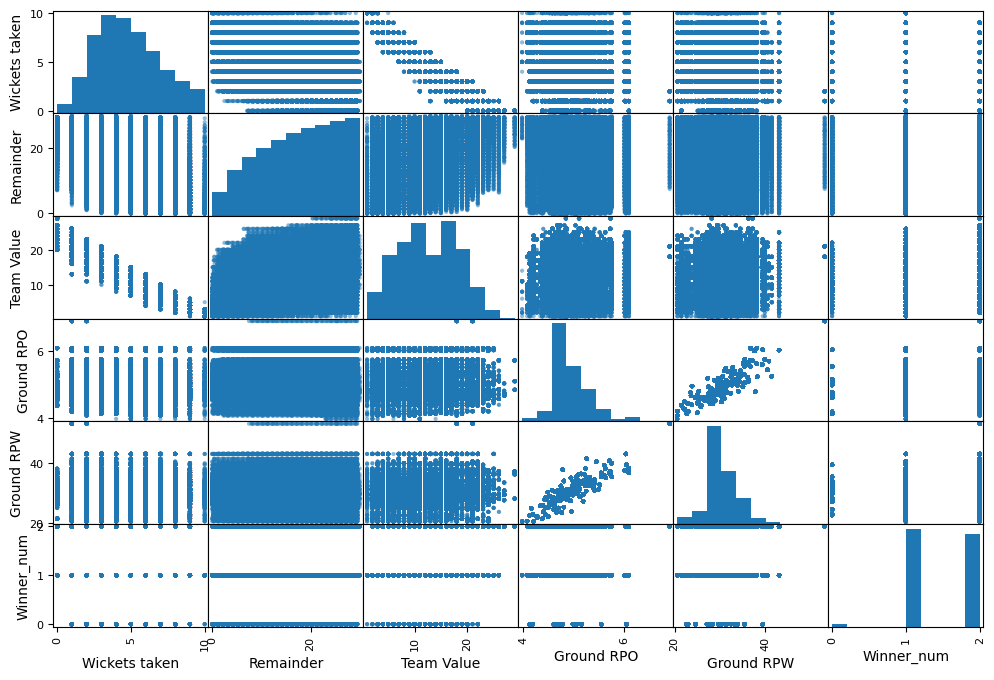

In [30]:
from pandas.plotting import scatter_matrix

attributes = ["Wickets taken", "Remainder", "Team Value", "Ground RPO", "Ground RPW", "Winner_num"]
scatter_matrix(data_train[attributes], figsize=(12, 8))
plt.show()

Experiment with Attribute combinations

Commentary

Shall I plot the Winner before I categorise?
Very imbalanced - 1 and 2 mainly fine but 0 not.

Be careful that any data added is to the end, given the row index is a unique iD.

https://www.analyticsvidhya.com/blog/2020/07/10-techniques-to-deal-with-class-imbalance-in-machine-learning/#:~:text=In%20a%20dataset%20with%20highly,obviously%20not%20the%20correct%20one.

Models

Random Forest
SVM
Neural Network

Split the data